# Booktuber Bias

Title: “Are Booktubers Overhyping Your DNF Pile?”

🧠 Concept:
Compare ratings from a Booktuber’s recommendation list with your personal ratings (or Goodreads average ratings) to detect possible bias, hype, or mismatch.

✅ Goals:
Identify which books Booktubers loved but the public didn’t—or vice versa.

Spot genre/author preference patterns in Booktuber picks.

Create a fun chart: “Overhyped vs Underrated”

🔧 Tools:
Python (BeautifulSoup or requests + pandas)

Optional: Web scrape goodread/youtube transacript

Plot: Seaborn or Altair

🧩 Steps:
Pick one Booktuber video with a book list (Top 10 of 2023, 5-star reads, etc.).

Extract book titles manually or via web scraping.

Get average Goodreads ratings for each.

Compare with your rating or Goodreads average baseline (e.g., global mean).

Plot a scatterplot: x = Booktuber rating, y = Goodreads rating

🎁 Output:
A heatmap, scatterplot, or quadrant chart:

"Hype Discrepancy: Who’s Overrated, Who’s Underrated?"

🔥 Vibe:
Witty, data-driven, perfect for Instagram stories or a blog post.
Can become a monthly series: "Hype Check: June Edition".

### Data Tidy Up

In [7]:
import pandas as pd
import re

# Load the CSV into a DataFrame
df = pd.read_csv("data/jack_edwards_goodread_cleaned.csv")

rating_order = [
    'did not like it',
    'it was ok',
    'liked it',
    'really liked it',
    'it was amazing'
]

df["Booktuber_Rating"] = pd.Categorical(
    df["Booktuber_Rating"],
    categories=rating_order,
    ordered=True
)

rating_map = {
    'did not like it': 1,
    'it was ok': 2,
    'liked it': 3,
    'really liked it': 4,
    'it was amazing': 5
}

df["Booktuber_Rating_Num"] = df["Booktuber_Rating"].map(rating_map)

In [9]:
df.head()

,Title,Author,Average_Rating,Booktuber_Rating,Date_Read,Date_Added,Booktuber_Rating_Num
0,Wandering Stars,"Orange, Tommy",3.84,really liked it,"Jun 10, 2025","Jun 08, 2025",4
1,Skipshock,"O'Donoghue, Caroline",4.28,really liked it,"May 27, 2025","May 27, 2025",4
2,Glorious Exploits,"Lennon, Ferdia",4.15,it was amazing,"May 27, 2025","May 27, 2025",5
3,Gunk,"Sams, Saba",3.95,it was amazing,"Jun 08, 2025","May 25, 2025",5
4,Perfection,"Latronico, Vincenzo",3.65,really liked it,"May 22, 2025","May 22, 2025",4


In [12]:
def tidy_date(val):
    """
    Parse strings like:
      - "Jun 10, 2025"    → full date
      - "May, 2024"       → assume 1st of that month
    """
    if pd.isna(val):
        return pd.NaT
    s = str(val).strip()

    # Pattern: Month name, year (e.g. "May, 2024")
    if re.fullmatch(r'^[A-Za-z]{3,9}, \d{4}$', s):
        # Try abbreviated month first, then full month name
        for fmt in ("%b, %Y", "%B, %Y"):
            try:
                return pd.to_datetime(s, format=fmt)
            except ValueError:
                continue

    # Pattern: Month day, year (e.g. "Jun 08, 2025" or "June 8, 2025")
    if re.fullmatch(r'^[A-Za-z]{3,9} \d{1,2}, \d{4}$', s):
        for fmt in ("%b %d, %Y", "%B %d, %Y"):
            try:
                return pd.to_datetime(s, format=fmt)
            except ValueError:
                continue

    # Fallback: let pandas infer
    return pd.to_datetime(s, errors='coerce')

# Apply to your columns
df['date_added_clean']  = df['Date_Added'].apply(tidy_date)
df['date_read_clean'] = df['Date_Read'].apply(tidy_date)

df.head()

,Title,Author,Average_Rating,Booktuber_Rating,Date_Read,Date_Added,Booktuber_Rating_Num,date_added_clean,date_read_clean
0,Wandering Stars,"Orange, Tommy",3.84,really liked it,"Jun 10, 2025","Jun 08, 2025",4,2025-06-08,2025-06-10
1,Skipshock,"O'Donoghue, Caroline",4.28,really liked it,"May 27, 2025","May 27, 2025",4,2025-05-27,2025-05-27
2,Glorious Exploits,"Lennon, Ferdia",4.15,it was amazing,"May 27, 2025","May 27, 2025",5,2025-05-27,2025-05-27
3,Gunk,"Sams, Saba",3.95,it was amazing,"Jun 08, 2025","May 25, 2025",5,2025-05-25,2025-06-08
4,Perfection,"Latronico, Vincenzo",3.65,really liked it,"May 22, 2025","May 22, 2025",4,2025-05-22,2025-05-22


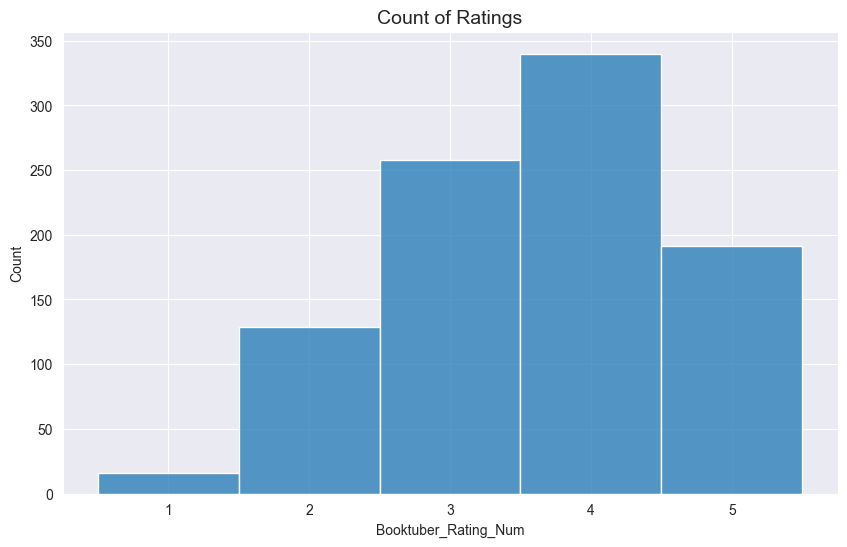

In [5]:
from quickplots import LinePlot, BarPlot, BoxPlot, HistogramPlot

hp = HistogramPlot()
hp.plot(data=df['Booktuber_Rating_Num'],bins= 5, title='Count of Ratings').show()